<a href="https://colab.research.google.com/github/AlirezaAhadipour/NN-from-scratch/blob/main/makemore_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
words = open('names.txt', 'r').read().splitlines()
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [32]:
len(words)

32033

In [33]:
# build the vocabulary of chars and mapping to/from integers
chars = sorted(list(set(''.join(words))))

str_to_int = {s:i+1 for i , s in enumerate(chars)}
str_to_int['.'] = 0

int_to_str = {i:s for s, i in str_to_int.items()}
vocab_size = len(int_to_str)
print(int_to_str)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [34]:
# build the dataset
block_size = 3   # num of chars we take to predict the next one
def build_dataset(words):
    X, y = [], []

    for word in words:
      context = [0] * block_size

      for char in word + '.':
        ix = str_to_int[char]
        X.append(context)
        y.append(ix)

        context = context[1:] + [ix]

    X = torch.tensor(X)
    y = torch.tensor(y)
    print(X.shape, y.shape)
    return X, y

In [35]:
import random

random.seed(42)
random.shuffle(words)

n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_train, y_train = build_dataset(words[:n1])   # 80%
X_dev, y_dev = build_dataset(words[n1:n2])     # 10%
X_test, y_test = build_dataset(words[n2:])     # 10%

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [36]:
# MLP
n_embd = 10   # dimentionality of the character embedding vector
n_hidden = 200   # number of neurons in teh hidden layer of MLP

C = torch.randn((vocab_size,n_embd))
W1 = torch.randn(n_embd*block_size, n_hidden)
b1 = torch.randn(n_hidden)
W2 = torch.randn(n_hidden, vocab_size)
b2 = torch.randn(vocab_size)

parameters = [C, W1, b1, W2, b2]

n_param = sum(p.nelement() for p in parameters)
print(n_param)

for p in parameters:
  p.requires_grad = True

11897


In [39]:
# some optimizations
max_steps = 200000
batch_size = 32
lossi = []

for i in range(max_steps):
    # minibatch construct
    ix = torch.randint(0, X_train.shape[0], (batch_size,))
    X_batch, y_batch = X_train[ix], y_train[ix]

    # forward pass
    emb = C[X_batch]   # embed of characters into vectors
    embcat = emb.view(emb.shape[0], -1)   # concatenate the vectors
    hpreact = embcat @ W1 + b1   # hidden layer pre-activation
    h = torch.tanh(hpreact)   # hidden layer
    logits = h @ W2 + b2   # output layer
    loss = F.cross_entropy(logits, y_batch)   # loss function

    # backward pass
    for param in parameters:
      param.grad = None

    loss.backward()

    # update
    lr = 0.1 if i < 100000 else 0.01   # step learning rate decay
    for param in parameters:
      param.data += -lr * param.grad

    # track stats
    if i % 10000 == 0:   # print once in a while
        print(f'{i:7d}/{max_steps:7d}: {loss.item():.4f}')
    lossi.append(loss.log10().item())

      0/ 200000: 25.1276
  10000/ 200000: 2.4119
  20000/ 200000: 2.2050
  30000/ 200000: 2.7741
  40000/ 200000: 1.9901
  50000/ 200000: 2.6937
  60000/ 200000: 2.6310
  70000/ 200000: 2.4138
  80000/ 200000: 2.3741
  90000/ 200000: 2.3487
 100000/ 200000: 2.4259
 110000/ 200000: 2.0040
 120000/ 200000: 2.1428
 130000/ 200000: 2.1988
 140000/ 200000: 2.0734
 150000/ 200000: 2.3632
 160000/ 200000: 1.9954
 170000/ 200000: 2.2142
 180000/ 200000: 2.3518
 190000/ 200000: 2.3267


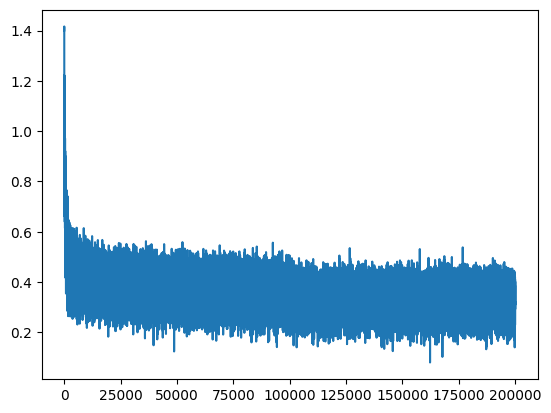

In [40]:
plt.plot(lossi)

In [ ]:
for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    embd = C[torch.tensor([context])]
    h = torch.tanh(embd.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1).item()
    context = context[1:] + [ix]
    out.append(ix)

    if ix == 0:
      break

  print(''.join(int_to_str[i] for i in out))

asalvinni.
kyia.
dyla.
sal.
tarim.
mick.
kaylee.
jaylon.
din.
crinn.
zyme.
sabarron.
abet.
pah.
tyrah.
alemirrincie.
faniya.
kynleez.
grachia.
temeir.
